In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import zipfile

z = zipfile.ZipFile('archive(1).zip')

z.extractall()

In [3]:
folder = 'brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [4]:
folder = 'brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the no dir.")

All files are renamed in the no dir.


In [5]:
listyes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("brain_tumor_dataset/no/")
number_files_no = len(listno)
print(number_files_no)

155
98


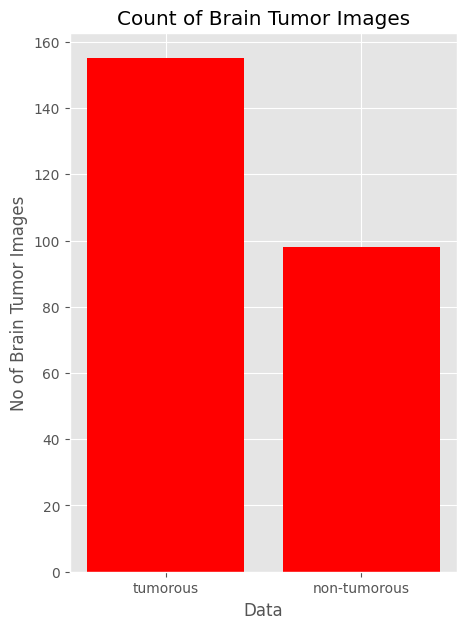

In [6]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2024-11-30 19:56:09.868115: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 19:56:09.874672: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 19:56:09.893908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732976769.928615   14938 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732976769.938431   14938 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 19:56:09.974055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [47]:
def timing(sec_elapsed):
    h = int(sec_elapsed // (60*60))
    m = int((sec_elapsed % (60*60)) // 60)
    s = sec_elapsed % 60
    return f"{h:02}:{m:02}:{s:02}"

In [49]:
import os
import cv2


def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )
    
    os.makedirs(save_to_dir, exist_ok=True)
    
    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)
        
        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Skipping file {filename}, as it could not be read.")
                continue
            
            image = image.reshape((1,) + image.shape)
            save_prefix = 'aug_' + os.path.splitext(filename)[0]
            i = 0
            
            for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
                i += 1
                if i >= n_generated_samples:
                    break
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# Example usage
augmented_data(
    file_dir='brain_tumor_dataset/yes', 
    n_generated_samples=6, 
    save_to_dir='augmented_data/yes'
)
augmented_data(
    file_dir='brain_tumor_dataset/no', 
    n_generated_samples=9, 
    save_to_dir='augmented_data/no'
)

In [37]:
# import time
# start_time = time.time()

# yes_path = 'brain_tumor_dataset/yes' 
# no_path = 'brain_tumor_dataset/no'

# augmented_data_path = 'augmented_data/'

# augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
# augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

# end_time = time.time()
# execution_time = end_time - start_time
# print(timing(execution_time))

0:0:0.0005903244018554688


In [50]:
import os

def data_summary(main_path):
    yes_path = os.path.join(main_path, "yes")
    no_path = os.path.join(main_path, "no")
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = n_pos + n_neg
    
    if n == 0:
        print("No samples found.")
    else:
        pos_per = (n_pos * 100) / n
        neg_per = (n_neg * 100) / n
        
        print(f"Number of samples: {n}")
        print(f"Number of positive samples: {n_pos}, which is {pos_per:.2f}%")
        print(f"Number of negative samples: {n_neg}, which is {neg_per:.2f}%")

# Call the function
data_summary("augmented_data")

Number of samples: 1827
Number of positive samples: 936, which is 51.23%
Number of negative samples: 891, which is 48.77%


In [41]:
# import os

# def data_summary(main_path):
#     yes_path = os.path.join(main_path, "yes")
#     no_path = os.path.join(main_path, "no")
    
#     n_pos = len(os.listdir(yes_path))
#     n_neg = len(os.listdir(no_path))
    
#     n = n_pos + n_neg
    
#     if n == 0:
#         print("No samples found.")
#     else:
#         pos_per = (n_pos * 100) / n
#         neg_per = (n_neg * 100) / n
        
#         print(f"Number of samples: {n}")
#         print(f"Number of positive samples: {n_pos}, which is {pos_per:.2f}%")
#         print(f"Number of negative samples: {n_neg}, which is {neg_per:.2f}%")

# # Call the function
# data_summary("augmented_data")


No samples found.


In [42]:
# import os
# import time

# # Placeholder function for data augmentation
# def augmented_data(file_dir, n_generated_samples, save_to_dir):
#     # Simulate file creation for testing purposes
#     os.makedirs(save_to_dir, exist_ok=True)
#     for i in range(n_generated_samples):
#         with open(os.path.join(save_to_dir, f"file_{i}.txt"), 'w') as f:
#             f.write(f"Sample data {i}")

# # Augmenting data
# start_time = time.time()

# yes_path = 'brain_tumor_dataset/yes' 
# no_path = 'brain_tumor_dataset/no'
# augmented_data_path = 'augmented_data/'

# augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
# augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

# # Check the contents of the directories
# print("Files in 'yes' directory:", os.listdir(augmented_data_path+'yes'))
# print("Files in 'no' directory:", os.listdir(augmented_data_path+'no'))


Execution time: 0.005734682083129883 seconds
Files in 'yes' directory: ['file_3.txt', 'file_2.txt', 'file_5.txt', 'file_4.txt', 'file_1.txt', 'file_0.txt']
Files in 'no' directory: ['file_3.txt', 'file_2.txt', 'file_7.txt', 'file_5.txt', 'file_6.txt', 'file_4.txt', 'file_8.txt', 'file_1.txt', 'file_0.txt']


In [51]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)


936
891


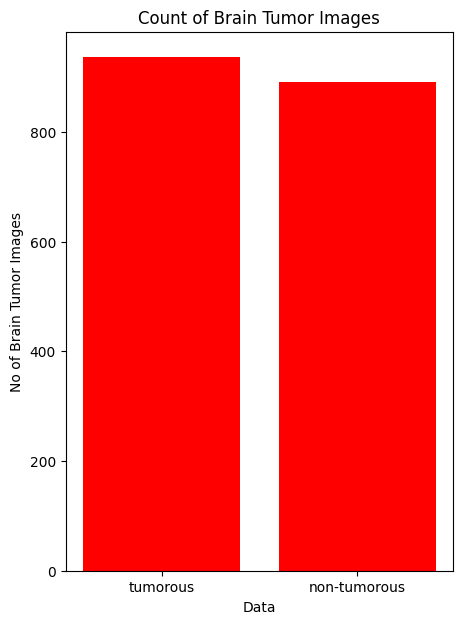

In [52]:
import matplotlib.pyplot as plt

#d
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()



In [53]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

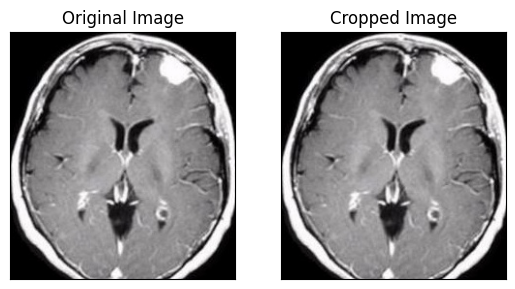

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [67]:
img = cv2.imread('/home/sunbeam/Downloads/augmented_data/yes/aug_Y_1_0_5892.jpg')
crop_brain_tumor(img, True)

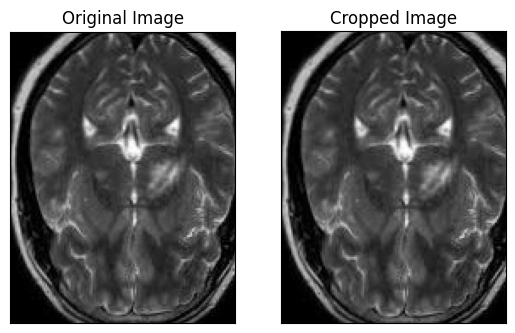

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [2, 2, 2],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [69]:
img = cv2.imread('/home/sunbeam/Downloads/augmented_data/no/aug_N_1_0_331.jpg')
crop_brain_tumor(img, True)

In [76]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.4 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 5.6 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

def crop_brain_tumor(image, plot=False):
    if image is None:
        print("Error: Image is empty or cannot be loaded.")
        return None
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    if len(cnts) == 0:
        print("No contours found.")
        return None
    
    c = max(cnts, key=cv2.contourArea)
    
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    
    return new_image

def load_data(dir_list, image_size):
    X = []
    y = []
    
    image_width, image_height = image_size
    
    for directory in dir_list:
        if not os.listdir(directory):
            print(f"Directory {directory} is empty. Skipping...")
            continue
        
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            
            if image is None:
                print(f"Error loading image {filename}. Skipping...")
                continue
            
            image = crop_brain_tumor(image, plot=False)
            
            if image is not None:
                image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
                image = image / 255.0
                X.append(image)
                
                if directory[-3:] == "yes":
                    y.append(1)
                else:
                    y.append(0)
    
    X = np.array(X)
    y = np.array(y)
    
    X, y = shuffle(X, y)
    print(f"Number of examples: {len(X)}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X, y

# Example usage
augmented_yes = 'augmented_data/yes'
augmented_no = 'augmented_data/no'
IMAGE_WIDTH, IMAGE_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Error loading image file_3.txt. Skipping...
Error loading image file_2.txt. Skipping...
Error loading image file_5.txt. Skipping...
Error loading image file_4.txt. Skipping...
Error loading image file_1.txt. Skipping...
Error loading image file_0.txt. Skipping...
Error loading image file_3.txt. Skipping...
Error loading image file_2.txt. Skipping...
Error loading image file_7.txt. Skipping...
Error loading image file_5.txt. Skipping...
Error loading image file_6.txt. Skipping...
Error loading image file_4.txt. Skipping...
Error loading image file_8.txt. Skipping...
Error loading image file_1.txt. Skipping...
Error loading image file_0.txt. Skipping...
Number of examples: 1812
X shape: (1812, 240, 240, 3)
y shape: (1812,)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(X, y, n=50):
    for label in [0, 1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(np.ceil(n / columns_n))

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

# Example usage
# Assuming X and y are your image data and labels
# plot_sample_images(X, y, n=50)


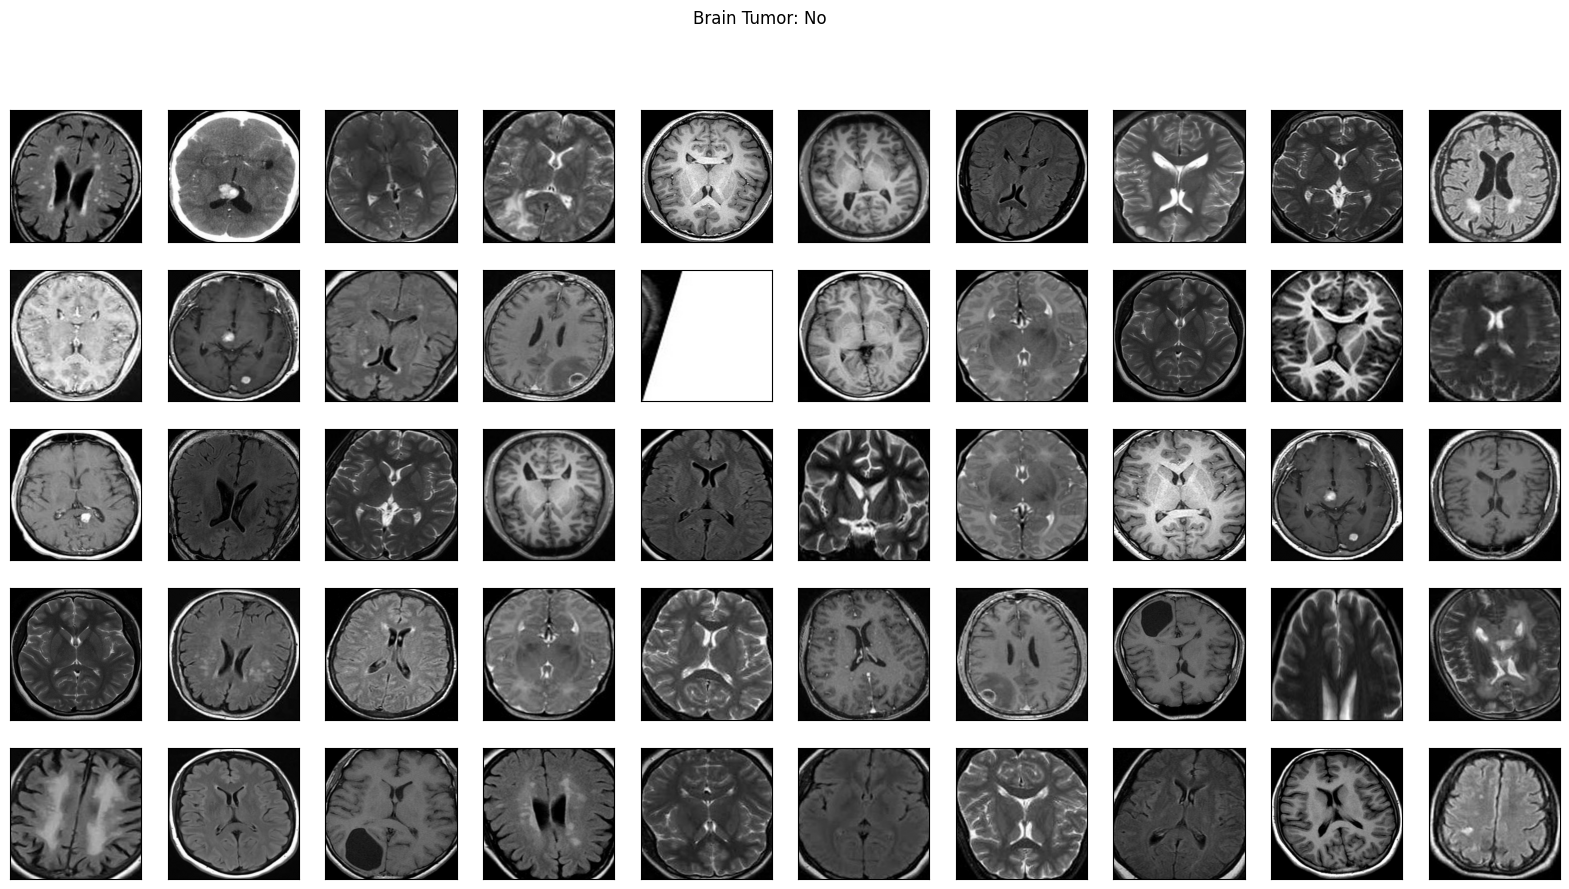

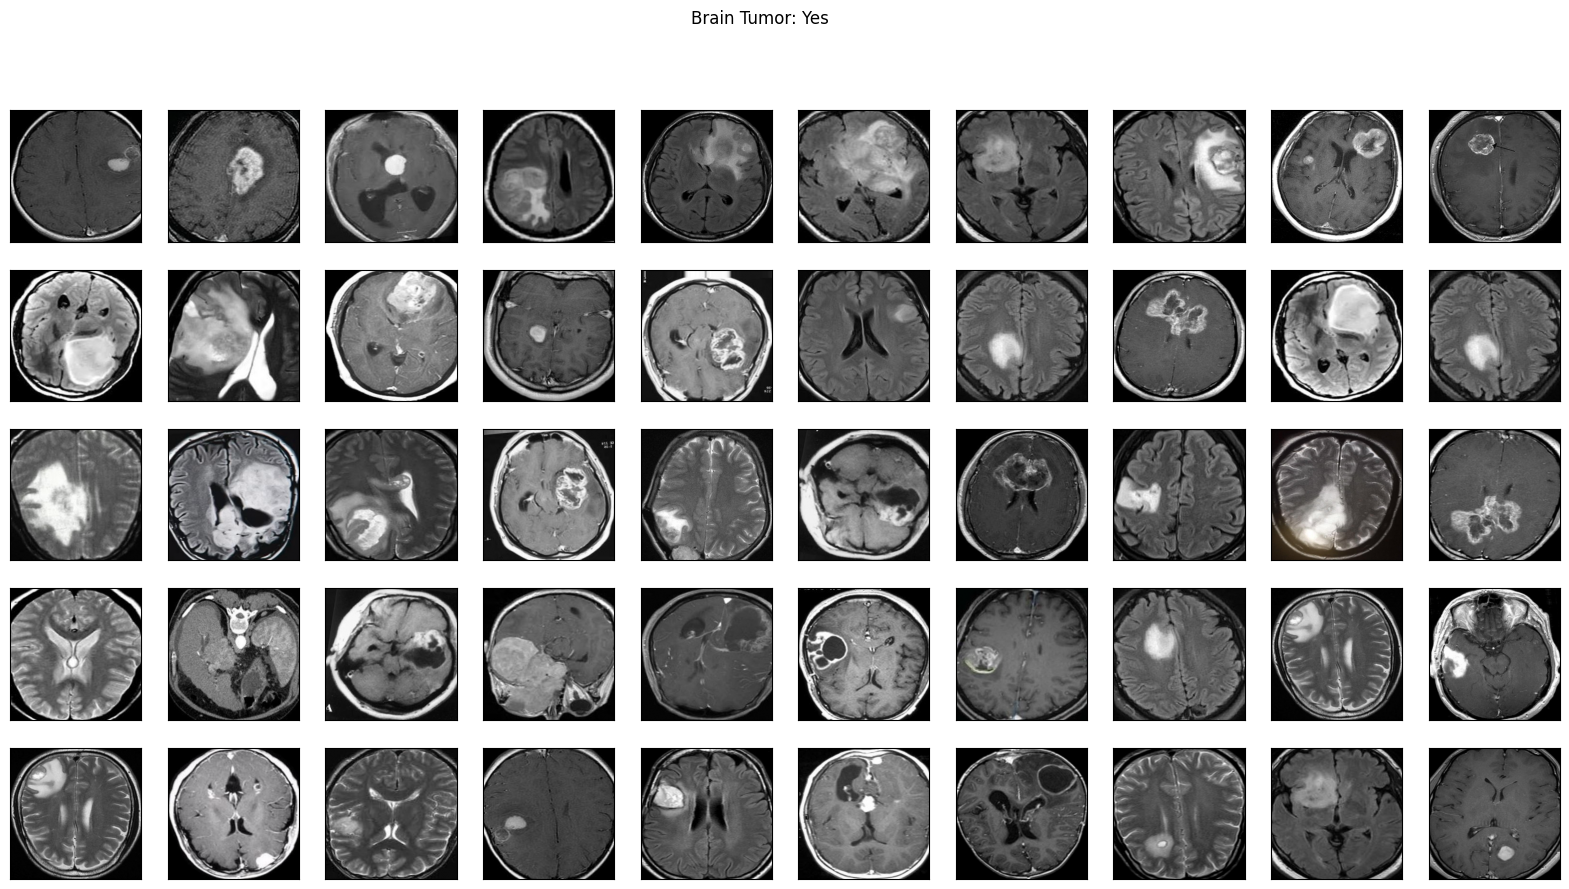

In [7]:
plot_sample_images(X,y)

In [8]:
import os

base_dir = 'tumorous_and_nontumorous'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

In [9]:
import os

base_dir = 'tumorous_and_nontumorous'

# Ensure the base directory exists
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create subdirectories for train, test, and validation sets
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)


In [15]:
import os

# Ensure the base directory exists
base_dir = 'tumorous_and_nontumorous'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create train, test, and valid directories if they don't exist
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

# Create subdirectories for tumorous data
infected_train_dir = os.path.join(train_dir, 'tumorous')
if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)

infected_test_dir = os.path.join(test_dir, 'tumorous')
if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)

infected_valid_dir = os.path.join(valid_dir, 'tumorous')
if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)


In [16]:
import os

base_dir = 'tumorous_and_nontumorous'

# Ensure the base directory exists
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create train, test, and valid directories if they don't exist
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

# Create subdirectories for tumorous data
infected_train_dir = os.path.join(train_dir, 'tumorous')
if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)

infected_test_dir = os.path.join(test_dir, 'tumorous')
if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)

infected_valid_dir = os.path.join(valid_dir, 'tumorous')
if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)

# Create subdirectories for nontumorous data
healthy_train_dir = os.path.join(train_dir, 'nontumorous')
if not os.path.isdir(healthy_train_dir):
    os.mkdir(healthy_train_dir)

healthy_test_dir = os.path.join(test_dir, 'nontumorous')
if not os.path.isdir(healthy_test_dir):
    os.mkdir(healthy_test_dir)

healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
if not os.path.isdir(healthy_valid_dir):
    os.mkdir(healthy_valid_dir)


In [17]:
import os
import shutil

# Define paths for the original datasets
original_dataset_tumorous = os.path.join('augmented_data', 'yes/')
original_dataset_nontumorous = os.path.join('augmented_data', 'no/')

# Define base directory
base_dir = 'tumorous_and_nontumorous'

# Ensure the base directory exists
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create train, test, and valid directories if they don't exist
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

# Create subdirectories for tumorous data
infected_train_dir = os.path.join(train_dir, 'tumorous')
if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)

infected_test_dir = os.path.join(test_dir, 'tumorous')
if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)

infected_valid_dir = os.path.join(valid_dir, 'tumorous')
if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)

# Create subdirectories for nontumorous data
healthy_train_dir = os.path.join(train_dir, 'nontumorous')
if not os.path.isdir(healthy_train_dir):
    os.mkdir(healthy_train_dir)

healthy_test_dir = os.path.join(test_dir, 'nontumorous')
if not os.path.isdir(healthy_test_dir):
    os.mkdir(healthy_test_dir)

healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
if not os.path.isdir(healthy_valid_dir):
    os.mkdir(healthy_valid_dir)

# List files and copy to the new structure
files = os.listdir(original_dataset_tumorous)
fnames = files[:759]  # Limit to 759 files to avoid index errors

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"Copied {len(fnames)} tumorous files to the training directory.")

# Repeat similar steps for nontumorous data as needed


Copied 759 tumorous files to the training directory.


In [22]:
import os
import shutil

# Define paths for the original datasets
original_dataset_tumorous = os.path.join('augmented_data', 'yes/')
original_dataset_nontumorous = os.path.join('augmented_data', 'no/')

# Define base directory
base_dir = 'tumorous_and_nontumorous'

# Ensure the base directory exists
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create train, test, and valid directories if they don't exist
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

# Create subdirectories for tumorous data
infected_train_dir = os.path.join(train_dir, 'tumorous')
if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)

infected_test_dir = os.path.join(test_dir, 'tumorous')
if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)

infected_valid_dir = os.path.join(valid_dir, 'tumorous')
if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)

# Create subdirectories for nontumorous data
healthy_train_dir = os.path.join(train_dir, 'nontumorous')
if not os.path.isdir(healthy_train_dir):
    os.mkdir(healthy_train_dir)

healthy_test_dir = os.path.join(test_dir, 'nontumorous')
if not os.path.isdir(healthy_test_dir):
    os.mkdir(healthy_test_dir)

healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
if not os.path.isdir(healthy_valid_dir):
    os.mkdir(healthy_valid_dir)

# Copy files for tumorous data
files_tumorous = os.listdir(original_dataset_tumorous)
fnames_tumorous = files_tumorous[:759]  # Limit to 759 files to avoid index errors

for fname in fnames_tumorous:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"Copied {len(fnames_tumorous)} tumorous files to the training directory.")

# Copy files for nontumorous data
files_nontumorous = os.listdir(original_dataset_nontumorous)
fnames_nontumorous = files_nontumorous[:759]  # Limit to 759 files to avoid index errors

for fname in fnames_nontumorous:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"Copied {len(fnames_nontumorous)} nontumorous files to the training directory.")


Copied 759 tumorous files to the training directory.
Copied 759 nontumorous files to the training directory.


In [23]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)


In [39]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(922,936):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

In [40]:
# 80% 10% 10%

In [41]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

In [42]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(686,833):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)



In [51]:


files = os.listdir('augmented_data/no/')
fnames = []
for i in range(833,891):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)



In [52]:
# Model Buliding

In [58]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip show keras

Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /home/sunbeam/.local/lib/python3.10/site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [63]:
pip show keras

Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /home/sunbeam/.local/lib/python3.10/site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install --upgrade keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=0.4,
    vertical_flip=0.4,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.4,
    height_shift_range=0.4,
    fill_mode='nearest'
)

# Validation Data Generator
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

# Test Data Generator
test_data_gen = ImageDataGenerator(rescale=1.0/255)


2024-11-30 22:52:07.046213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 22:52:07.050582: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 22:52:07.063505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732987327.087970   36613 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732987327.094659   36613 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 22:52:07.119672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')


Found 1506 images belonging to 2 classes.


In [4]:
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 308 images belonging to 2 classes.


In [5]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')


Found 70 images belonging to 2 classes.


In [6]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

In [7]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [9]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG19 base model
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the model
model_01 = Model(inputs=base_model.input, outputs=output)
model_01.summary()

2024-11-30 22:59:18.156440: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# callback
filepath = 'model.keras'  # Updated file extension
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)


In [15]:
from tensorflow.keras.optimizers import SGD

# Define the SGD optimizer with hyperparameters
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model with the optimizer and loss function
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [16]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5250 - loss: 0.7394 

/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.75642, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 163s 16s/step - accuracy: 0.5234 - loss: 0.7397 - val_accuracy: 0.4000 - val_loss: 0.7564 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5698 - loss: 0.6975 
Epoch 2: val_loss improved from 0.75642 to 0.68682, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 184s 19s/step - accuracy: 0.5680 - loss: 0.6990 - val_accuracy: 0.6000 - val_loss: 0.6868 - learning_rate: 1.0000e-04


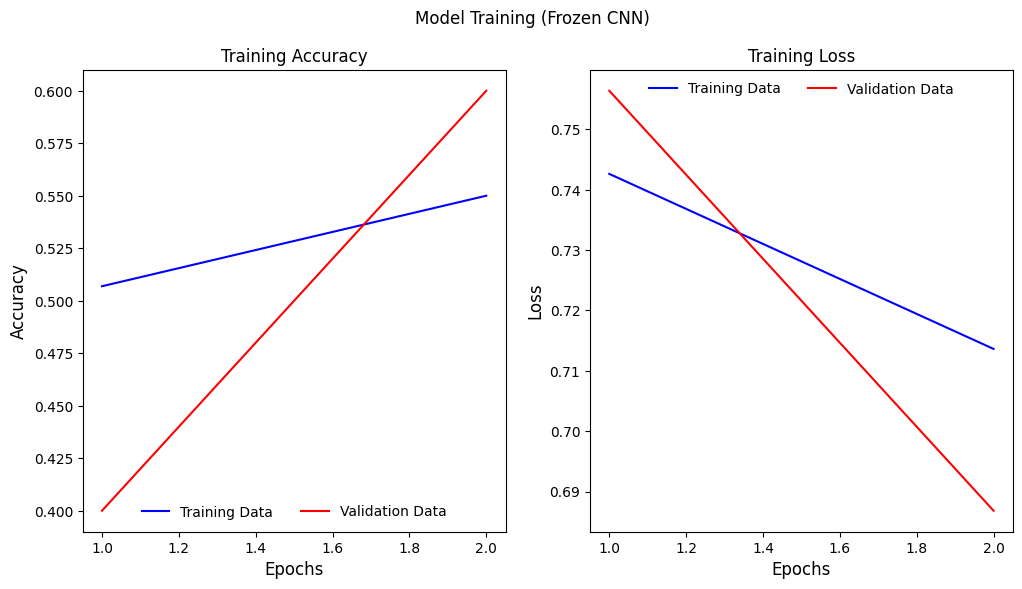

In [18]:
# Plot performance
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [27]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)

In [29]:
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.5891 - loss: 0.7000


/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - accuracy: 0.5645 - loss: 0.6904


In [30]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.6971243023872375
Validation Acc: 0.6000000238418579
Testing Loss: 0.6926901936531067
Testing Acc: 0.5551947951316833


In [32]:
import numpy as np
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

308/308 ━━━━━━━━━━━━━━━━━━━━ 124s 357ms/step 


In [33]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [35]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG19 base model
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

# List the layer names of the base model
base_model_layer_names = [layer.name for layer in base_model.layers]
print(base_model_layer_names)

# Add custom layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the new model
model_02 = Model(base_model.inputs, output)

# Load the weights
model_02.load_weights('model_weights/vgg19_model_01.weights.h5')

# Set trainable layers
set_trainable = False
for layer in base_model.layers:
    if layer.name in ['block5_conv4', 'block5_conv3']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Print the model summary
print(model_02.summary())

['input_layer_3', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool']


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [36]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [37]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2


/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_76']
Received: inputs=Tensor(shape=(None, 240, 240, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.6000 - loss: 0.6629 
Epoch 1: val_loss improved from 0.68682 to 0.66101, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 212s 21s/step - accuracy: 0.5981 - loss: 0.6636 - val_accuracy: 0.5714 - val_loss: 0.6610 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.5233 - loss: 0.7262 
Epoch 2: val_loss improved from 0.66101 to 0.65844, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 216s 22s/step - accuracy: 0.5260 - loss: 0.7247 - val_accuracy: 0.6571 - val_loss: 0.6584 - learning_rate: 1.0000e-04


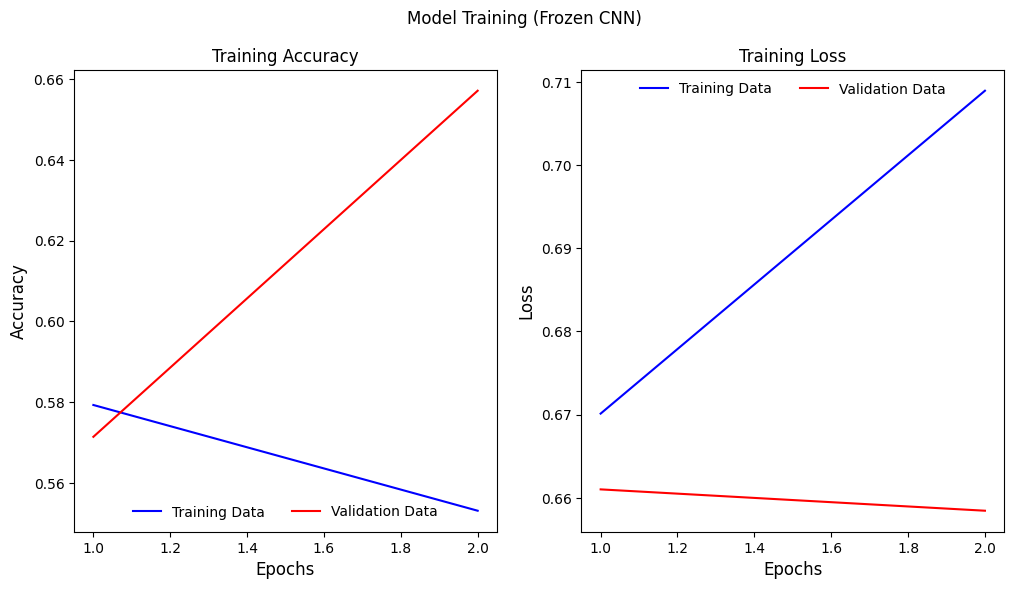

In [38]:
# Plot performance
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [40]:
import os

# Ensure the directory exists
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save the model weights
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)


In [42]:
# Load the model weights
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")

# Evaluate the model on the validation and test datasets
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

print(f"Validation Evaluation: {vgg_val_eval_02}")
print(f"Test Evaluation: {vgg_test_eval_02}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.7282 - loss: 0.6126
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 14s/step - accuracy: 0.5099 - loss: 0.7130
Validation Evaluation: [0.620215117931366, 0.7142857313156128]
Test Evaluation: [0.7035261392593384, 0.5259740352630615]


In [44]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

/home/sunbeam/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [45]:
model_03.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras.optimizers import SGD

# Define the SGD optimizer with hyperparameters
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model with the optimizer and loss function
model_03.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [60]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.5012 - loss: 0.7378 
Epoch 1: val_loss did not improve from 0.65844
10/10 ━━━━━━━━━━━━━━━━━━━━ 539s 55s/step - accuracy: 0.5011 - loss: 0.7370 - val_accuracy: 0.4286 - val_loss: 0.7391 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48s/step - accuracy: 0.4687 - loss: 0.7544 
Epoch 2: val_loss improved from 0.65844 to 0.60162, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 526s 53s/step - accuracy: 0.4718 - loss: 0.7525 - val_accuracy: 0.8143 - val_loss: 0.6016 - learning_rate: 1.0000e-04


In [6]:
import os

# List all files in the model_weights directory
print(os.listdir('model_weights/'))

['vgg_unfrozen.weights.h5', 'vgg19_model_01.weights.h5', 'vgg19_model_02.weights.h5']
